In [ ]:
from google.colab import drive
drive.mount('/content/data')


Mounted at /content/data


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import random_split
import math

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import random_split
import math

image_size = 256
batch_size = 16

transformer = transforms.Compose([
    transforms.CenterCrop(image_size),
    transforms.ToTensor() # ToTensor() changes the range of the values from [0, 255] to [0.0, 1.0]
])

cartoon_dataset = ImageFolder('/content/data/MyDrive/img/test1/', transformer)
len_training_set = math.floor(len(cartoon_dataset) * 0.9)
len_valid_set = len(cartoon_dataset) - len_training_set

training_set, _ = random_split(cartoon_dataset, (len_training_set, len_valid_set))
cartoon_image_dataloader_train = DataLoader(training_set, batch_size, shuffle=True, num_workers=0)

In [ ]:
smoothed_cartoon_dataset = ImageFolder('/content/data/MyDrive/img/1/', transformer)

In [ ]:

len_training_set = math.floor(len(smoothed_cartoon_dataset) * 0.9)
len_valid_set = len(smoothed_cartoon_dataset) - len_training_set
training_set, _ = random_split(smoothed_cartoon_dataset, (len_training_set, len_valid_set))
smoothed_cartoon_image_dataloader_train = DataLoader(training_set, batch_size, shuffle=True, num_workers=0)

torch.Size([3, 256, 256])
Current range: 0.0235294122248888 to 1.0


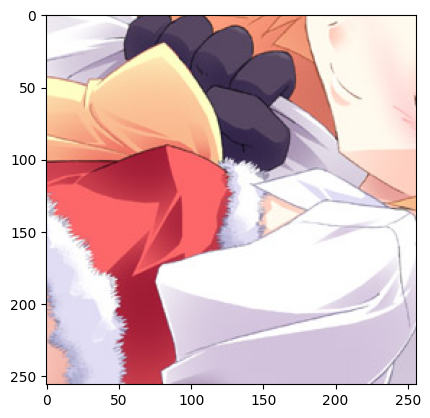

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_sample_image(dataloader):
  iterator = iter(dataloader)
  sample_batch, _ = next(iterator)
  first_sample_image_of_batch = sample_batch[0]
  print(first_sample_image_of_batch.size())
  print("Current range: {} to {}".format(first_sample_image_of_batch.min(), first_sample_image_of_batch.max()))
  plt.imshow(np.transpose(first_sample_image_of_batch.numpy(), (1, 2, 0)))

show_sample_image(cartoon_image_dataloader_train)

torch.Size([3, 256, 256])
Current range: 0.0 to 1.0


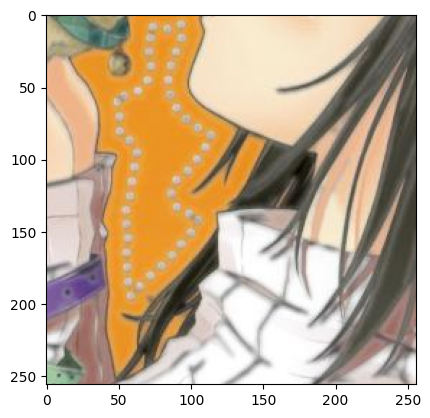

In [ ]:
show_sample_image(smoothed_cartoon_image_dataloader_train)

In [ ]:
!git clone https://github.com/TobiasSunderdiek/cartoon-gan.git

Cloning into 'cartoon-gan'...
remote: Enumerating objects: 641, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 641 (delta 52), reused 47 (delta 17), pack-reused 541
Receiving objects: 100% (641/641), 12.48 MiB | 19.58 MiB/s, done.
Resolving deltas: 100% (315/315), done.


In [ ]:
!unzip -n -q "/content/data/MyDrive/img/generator_release.pth.zip" -d  "/content/data/MyDrive/img/2"

unzip:  cannot find or open /content/data/MyDrive/img/generator_release.pth.zip, /content/data/MyDrive/img/generator_release.pth.zip.zip or /content/data/MyDrive/img/generator_release.pth.zip.ZIP.


In [ ]:
!make install-transform

make: *** No rule to make target 'install-transform'.  Stop.


In [ ]:
%%writefile  /content/cartoon-gan/photo_downloader.py

import os
from pycocotools.coco import COCO
import downloader
import config

PATH_TO_STORE_DOWNLOADED_PHOTOS = "/content/data/MyDrive/img/photos/"
PATH_TO_COCO_ANNOTATIONS_ROOT_FOLDER = "/content/data/MyDrive/DoAntot/code/instances_train2017.json/extract/"
DATA_TYPE='train2017'
ANNOTATION_FILE = '{}/annotations/instances_{}.json'.format(PATH_TO_COCO_ANNOTATIONS_ROOT_FOLDER, DATA_TYPE)
PHOTO_ZIPFILE_NAME = "/content/data/MyDrive/img/coco/"

def main():
    if not os.path.exists(PATH_TO_STORE_DOWNLOADED_PHOTOS):
        os.makedirs(PATH_TO_STORE_DOWNLOADED_PHOTOS)

    coco = COCO(ANNOTATION_FILE)

    personCategory = coco.getCatIds(catNms=['person'])
    personImageIds = coco.getImgIds(catIds=personCategory)
    personImageData = coco.loadImgs(personImageIds)
    personImageDataIterator = iter(personImageData)

    counter = downloader.init_counter(PATH_TO_STORE_DOWNLOADED_PHOTOS)
    while counter <= config.COUNT_IMAGES_TO_DOWNLOAD:
        try:
            filename_with_path, url = get_filename_and_url(personImageDataIterator)
            success = downloader.download_non_already_existing_images(filename_with_path, url)
            if success:
                counter += 1
                print("Download #", counter)
        except StopIteration:
            print('Tried to download more photos than available, stopping.')
            counter = config.COUNT_IMAGES_TO_DOWNLOAD + 1
            pass
    downloader.zip_images(PHOTO_ZIPFILE_NAME, PATH_TO_STORE_DOWNLOADED_PHOTOS)

def get_filename_and_url(personImageDataIterator):
    photo_data = next(personImageDataIterator)
    url = photo_data['coco_url']
    filename = photo_data['file_name']
    filename_with_path = PATH_TO_STORE_DOWNLOADED_PHOTOS + filename

    return filename_with_path, url

if __name__ == '__main__':
    main()

Overwriting /content/cartoon-gan/photo_downloader.py


In [ ]:
%cd cartoon-gan

[Errno 2] No such file or directory: 'cartoon-gan'
/content/cartoon-gan


In [ ]:
!make photos

python photo_downloader.py
loading annotations into memory...
Done (t=27.66s)
creating index...
index created!
Already downloaded files:  0
Download # 1
Download # 2
Download # 3
Download # 4
Download # 5
Download # 6
Download # 7
Download # 8
Download # 9
Download # 10
Download # 11
Download # 12
Download # 13
Download # 14
Download # 15
Download # 16
Download # 17
Download # 18
Download # 19
Download # 20
Download # 21
Download # 22
Download # 23
Download # 24
Download # 25
Download # 26
Download # 27
Download # 28
Download # 29
Download # 30
Download # 31
Download # 32
Download # 33
Download # 34
Download # 35
Download # 36
Download # 37
Download # 38
Download # 39
Download # 40
Download # 41
Download # 42
Download # 43
Download # 44
Download # 45
Download # 46
Download # 47
Download # 48
Download # 49
Download # 50
Download # 51
Download # 52
Download # 53
Download # 54
Download # 55
Download # 56
Download # 57
Download # 58
Download # 59
Download # 60
Download # 61
Download # 62
D

In [ ]:
!find / -name instances_train2017*

find: ‘/proc/58/task/58/net’: Invalid argument
find: ‘/proc/58/net’: Invalid argument
find: ‘/proc/982/task/982/net’: Invalid argument
find: ‘/proc/982/net’: Invalid argument
